In [1]:
import os, sys
os.environ['ON_PY']="1"
from params import parser
from common_utils import setup_seed
from data_utils import pack_data_from_config
import numpy as np
from test_script.base import Test
import matplotlib.pyplot as plt
import numpy as np

notebook_dir = os.getcwd()
print(notebook_dir)
# 将工作目录更改为上一级目录
os.chdir("/home/wlc/FJSP-DRL-main")



pygame 2.6.0 (SDL 2.28.4, Python 3.10.14)
Hello from the pygame community. https://www.pygame.org/contribute.html
/home/wlc/FJSP-DRL-main/plot_imgs


In [2]:
instances = [ "10x5x0+mix", "20x5x0+mix", "15x10x0+mix", "20x10x0+mix", ]
test_data_list = [ "10x5+mix", "20x5+mix", "15x10+mix", "20x10+mix",]


In [3]:


args = ["--test_data", *test_data_list,
        "--test_model", *instances]

ec_args = []

args = [*ec_args, *args]

print(args)


['--test_data', '10x5+mix', '20x5+mix', '15x10+mix', '20x10+mix', '--test_model', '10x5x0+mix', '20x5x0+mix', '15x10x0+mix', '20x10x0+mix']


In [4]:
# DAN 解
configs = parser.parse_args(args=args)

setup_seed(configs.seed_test)

test_model = []

for model_name in configs.test_model:
    test_model.append((f'./trained_network/{configs.model_source}/{model_name}.pth', model_name))
print(test_model)
test_data = pack_data_from_config(configs.data_source, configs.test_data)

baseline_makespans = []
for i in range(len(test_model)):
    model = test_model[i]
    data = test_data[i]
    print("datta[1]: ",data[1])
    print("-" * 25 + "Test Learned Model" + "-" * 25)
    print(f"test data name: {data[1]}")
    finetuning = True if model[1].startswith("maml") else False
    print(f"Model name : {model[1]}")
    result_5_times = []
    for j in range(2):
        test = Test(configs, data[0], model[0])     
        result = test.greedy_strategy(finetuning=finetuning)
        result_5_times.append(result)
    result_5_times = np.array(result_5_times)

    save_result = np.min(result_5_times, axis=0)
    print("testing results:")
    print(f"makespan(greedy): ", save_result[:, 0].mean())
    baseline_makespans.append(save_result[:, 0].mean())
    # print(f"time: ", save_result[:, 2].mean())
    # print(f"Max fast_adapt cnt:", save_result[:, 2].max())
    # print(f"Average fast_adapt time:", save_result[:, 3].mean())
    print("="*100)

baseline_makespans = np.array(baseline_makespans)
print(baseline_makespans)


[('./trained_network/SD2/10x5x0+mix.pth', '10x5x0+mix'), ('./trained_network/SD2/20x5x0+mix.pth', '20x5x0+mix'), ('./trained_network/SD2/15x10x0+mix.pth', '15x10x0+mix'), ('./trained_network/SD2/20x10x0+mix.pth', '20x10x0+mix')]
datta[1]:  10x5+mix
-------------------------Test Learned Model-------------------------
test data name: 10x5+mix
Model name : 10x5x0+mix
testing results:
makespan(greedy):  485.9
datta[1]:  20x5+mix
-------------------------Test Learned Model-------------------------
test data name: 20x5+mix
Model name : 20x5x0+mix
testing results:
makespan(greedy):  730.7
datta[1]:  15x10+mix
-------------------------Test Learned Model-------------------------
test data name: 15x10+mix
Model name : 15x10x0+mix
testing results:
makespan(greedy):  598.4
datta[1]:  20x10+mix
-------------------------Test Learned Model-------------------------
test data name: 20x10+mix
Model name : 20x10x0+mix
testing results:
makespan(greedy):  659.0
[485.9 730.7 598.4 659. ]


In [13]:

baseline_makespans = [444.4, 730.7, 598.4, 659.0]

In [5]:
# MAML finetuning
# 获取finetuning的每个过程

def VAE_finetuning_test(args):
    configs = parser.parse_args(args=args)
    # print(configs.hidden_dim_actor, configs.hidden_dim_critic)
    test_model = []
    for model_name in configs.test_model:
        test_model.append((f'./trained_network/{configs.model_source}/{model_name}.pth', model_name))
    print(test_model)

    model = test_model[0]

    test_data = pack_data_from_config(configs.data_source, configs.test_data)

    finetuning_makespans = []
    for data in test_data:
        ### 对每个实例
        print("datta[1]: ",data[1])
        print("-" * 25 + "Test Learned Model" + "-" * 25)
        print(f"test data name: {data[1]}")
        print(f"Model name : {model[1]}")
        test = Test(configs, data[0], model[0])
        finetuning_makespan = test.finetuning(times=5)
        
        finetuning_makespans.append(finetuning_makespan)

    return finetuning_makespans


In [6]:

model = "vari_vae_2024-12-09T10-12-35"
model = "vari_vae_2024-12-14T21-50-40"

args = [*ec_args, "--test_data", *test_data_list,  "--test_model", model, "--network_type", "VAE"  ]

maml_finetuning_makespans = VAE_finetuning_test(args)

print(maml_finetuning_makespans)


[('./trained_network/SD2/vari_vae_2024-12-14T21-50-40.pth', 'vari_vae_2024-12-14T21-50-40')]
datta[1]:  10x5+mix
-------------------------Test Learned Model-------------------------
test data name: 10x5+mix
Model name : vari_vae_2024-12-14T21-50-40
datta[1]:  20x5+mix
-------------------------Test Learned Model-------------------------
test data name: 20x5+mix
Model name : vari_vae_2024-12-14T21-50-40
datta[1]:  15x10+mix
-------------------------Test Learned Model-------------------------
test data name: 15x10+mix
Model name : vari_vae_2024-12-14T21-50-40
datta[1]:  20x10+mix
-------------------------Test Learned Model-------------------------
test data name: 20x10+mix
Model name : vari_vae_2024-12-14T21-50-40
[[711.0, 416.0, 443.0, 431.0, 376.0], [1119.0, 618.0, 633.0, 649.0, 647.0], [963.0, 631.0, 620.0, 637.0, 600.0], [1112.0, 600.0, 655.0, 653.0, 627.0]]


In [7]:
# pretrain finetuning

# args = [*ec_args, "--test_data", *test_data_list, 
#         # "--hidden_dim_actor", "512", "--hidden_dim_critic", "512",
#         "--test_model", "PreTrain"]

# pretrain_finetuning_makespans, pretrain_finetuning_ecs = VAE_finetuning_test(args)

pretrain_finetuning = [
    [778.0, 471.0, 492.0, 527.0, 456.0],
    [1225.0, 910.0, 960.0, 923.0, 946.0],
    [1290.0, 715.0, 719.0, 765.0, 652.0],
    [1556.0, 933.0, 1039.0, 1091.0, 990.0],
]


In [9]:
# random
import torch
from model.PPO import PPO_initialize

configs = parser.parse_args(args=args)
ppo = PPO_initialize(configs)

torch.save(ppo.policy.state_dict(), f'./trained_network/SD2/test_random_VAE.pth')

args = ["--test_data", *test_data_list, 
        "--test_model", "test_random_VAE", "--network_type", "VAE"  ]

random_finetuning = VAE_finetuning_test(args)

print( random_finetuning)


[('./trained_network/SD2/test_random_VAE.pth', 'test_random_VAE')]
datta[1]:  10x5+mix
-------------------------Test Learned Model-------------------------
test data name: 10x5+mix
Model name : test_random_VAE
datta[1]:  20x5+mix
-------------------------Test Learned Model-------------------------
test data name: 20x5+mix
Model name : test_random_VAE
datta[1]:  15x10+mix
-------------------------Test Learned Model-------------------------
test data name: 15x10+mix
Model name : test_random_VAE
datta[1]:  20x10+mix
-------------------------Test Learned Model-------------------------
test data name: 20x10+mix
Model name : test_random_VAE
[[711.0, 647.0, 592.0, 700.0, 640.0], [1119.0, 1182.0, 1158.0, 1168.0, 1168.0], [963.0, 885.0, 845.0, 756.0, 956.0], [1112.0, 1131.0, 1225.0, 1196.0, 1272.0]]


In [11]:
from plot_imgs.plt_utils import plot_funetuning


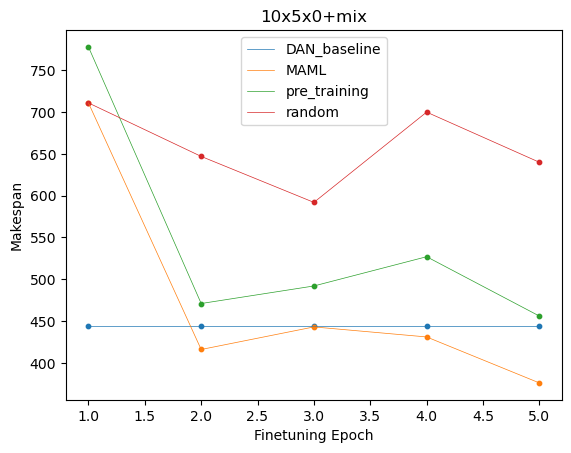

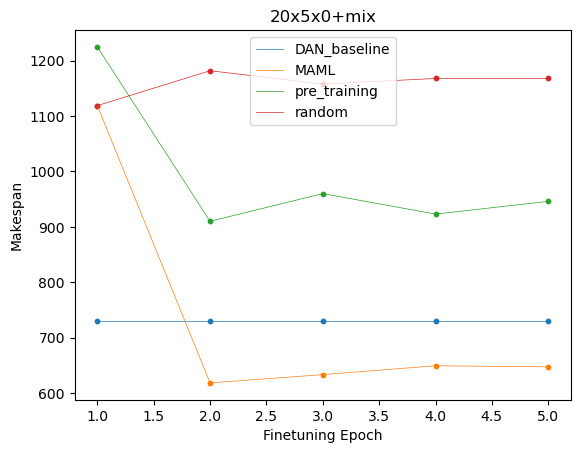

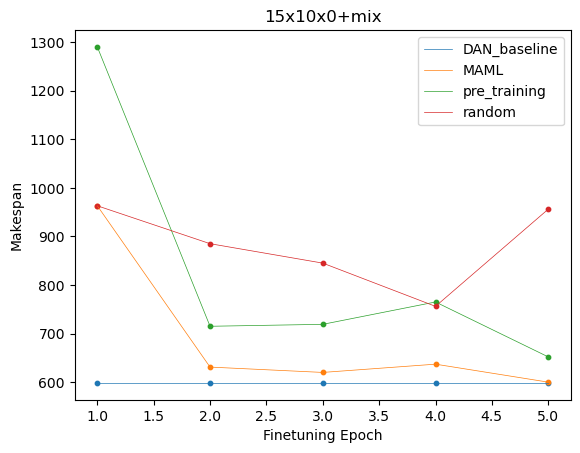

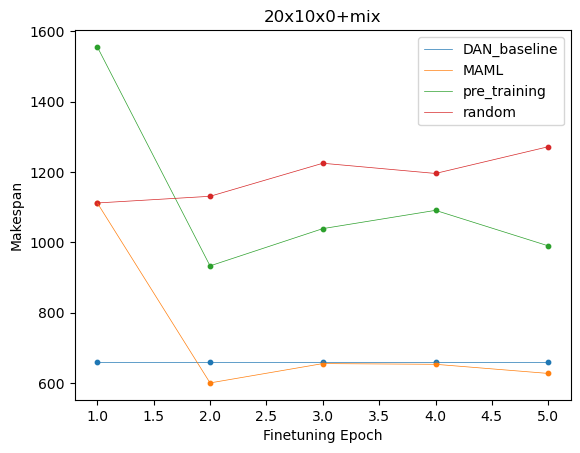

In [14]:

for idx, key in enumerate(instances):
    # plot_dict[key][0] = [baseline_makespans[idx]  for _ in range(configs.adapt_nums)]
    # plot_dict[key][0] = np.full(5, baseline_EC[idx])
    # plot_dict[key][1] = maml_finetuning_ecs[idx]
    # plot_dict[key][2] = pretrain_finetuning_ecs[idx]
    # plot_dict[key][3] = random_finetuning_ecs[idx]
    # # plot_makespan_fill(
    #     [np.full(5, baseline_EC[idx]), maml_finetuning_ecs[idx].mean(axis=0), pretrain_finetuning_ecs[idx].mean(axis=0), random_finetuning_ecs[idx].mean(axis=0)],
    #     [np.full(5, baseline_EC[idx]), maml_finetuning_ecs[idx].max(axis=0), pretrain_finetuning_ecs[idx].max(axis=0), random_finetuning_ecs[idx].max(axis=0)],
    #     [np.full(5, baseline_EC[idx]), maml_finetuning_ecs[idx].min(axis=0), pretrain_finetuning_ecs[idx].min(axis=0), random_finetuning_ecs[idx].min(axis=0)],
    #     key,
    # )
    plot_funetuning([np.full(5, baseline_makespans[idx]), maml_finetuning_makespans[idx], pretrain_finetuning[idx], random_finetuning[idx]], key, y_label="Makespan", label=True)



In [ ]:
plot_dict

{'10x5EC+ECMK': [array([9.60721719, 9.60721719, 9.60721719, 9.60721719, 9.60721719]),
  [12.474000384421082,
   9.404515682719332,
   10.054535376799727,
   10.218679510449029,
   9.722014414397584],
  [12.253379196030485,
   8.039078834803137,
   8.28674219241998,
   8.761584437401382,
   9.16480884603909],
  [12.474000384421082,
   11.330458091506108,
   11.045815599152245,
   12.539005372224393,
   13.05837387472679]],
 '20x5EC+ECMK': [array([16.51364197, 16.51364197, 16.51364197, 16.51364197, 16.51364197]),
  [22.90153086523137,
   21.016854192942915,
   23.500061068218884,
   20.798444115782697,
   21.872823692724037],
  [24.43044324984268,
   15.975432265358931,
   16.666384147938512,
   16.565116388072347,
   16.43607272749889],
  [22.90153086523137,
   25.061672217678147,
   25.182017406231346,
   26.2584959627625,
   24.651289028420802]],
 '15x10x0+mix+EC': [array([26.75289926, 26.75289926, 26.75289926, 26.75289926, 26.75289926]),
  [35.250804777316226,
   34.23237187978582,
 